In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
hea_dataset = "/content/drive/MyDrive/AlloyDataset/hea-dataset.csv"
SRO = "/content/drive/MyDrive/AlloyDataset/SRO.csv"
structure = "/content/drive/MyDrive/AlloyDataset/structure_ini_featurized.dat_all.csv"

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
dat = pd.read_csv(structure,index_col=0)
feature_names = dat.columns[-273:]
compo_names = feature_names[-145:]
struc_names = feature_names[:-145]

In [6]:
dat = dat.dropna()

In [8]:
df_sro = pd.read_csv(SRO,index_col=0)
dat = pd.concat([dat,df_sro],axis=1)

In [9]:
chemical_system = dat['chemical_system']
elements = ['Al','Si','Cr','Mn','Fe','Co','Ni','Cu']

Text(0, 0.5, 'Number of structures')

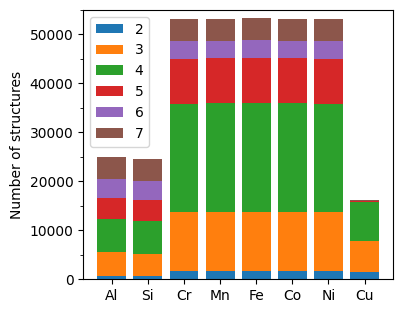

In [10]:
nstructures = {}
nstructures_nele = {}
for element in elements:
    nstructures[element] = chemical_system.str.contains(element).sum()
    for nele in range(2,8):
        nstructures_nele[element,nele] = dat[dat['nelements']==nele]['chemical_system'].str.contains(element).sum()

# bar plot
fig, ax = plt.subplots(figsize=(4,3.5))
# ax.bar(nstructures.keys(),nstructures.values())
# make a stacked bar plot using nstructures_nele
bottom = np.zeros(len(elements))
for nele in range(2,8):
    ax.bar(elements,[nstructures_nele[element,nele] for element in elements],bottom=bottom,label=str(nele))
    bottom += np.array([nstructures_nele[element,nele] for element in elements])
ax.legend()

ax.set_ylim(0,5.5e4)
# add minor yticks (5000)
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5000))
ax.set_ylabel('Number of structures')

In [11]:
X = dat[feature_names]
# drop columns whose variance is 0
X = X.loc[:,X.std()!=0]
# standardize the features and turn it into a df by keeping the index and column names
X_std = pd.DataFrame((X-X.mean())/X.std(), index=X.index, columns=X.columns)
# target
y = dat['Ef_per_atom']

In [12]:
sg = dat['space_group_number']
# lattice
lattice = dat['lattice']
# chemical SRO
csro = dat[['mean abs SRO'+str(i) for i in range(1,5)]]

In [13]:
natoms={}
for i in dat['NIONS'].unique():
    natoms[i] = dat[dat['NIONS']==i].index

smaller = dat[dat['NIONS']<=6].index
small = dat[dat['NIONS']<=8].index
large = dat[dat['NIONS']>8].index
low = dat[dat['nelements']<=2].index
high = dat[dat['nelements']>2].index

In [14]:
neles={}
for i in range(2,8):
    neles[i] = dat[dat['nelements']==i].index
    nsamll = dat[(dat['NIONS']<=8) & (dat['nelements']==i)].shape[0]
    nlarge = dat[(dat['NIONS']>8) & (dat['nelements']==i)].shape[0]
    n_chemsys = len(dat.loc[neles[i],'chemical_system'].unique())
    print(f'nelements={i}: {n_chemsys} chemical systems, {len(neles[i])} structures, {nsamll} small, {nlarge} large')

nelements=2: 28 chemical systems, 5690 structures, 4975 small, 715 large
nelements=3: 56 chemical systems, 25400 structures, 22098 small, 3302 large
nelements=4: 70 chemical systems, 33036 structures, 29494 small, 3542 large
nelements=5: 56 chemical systems, 10875 structures, 6157 small, 4718 large
nelements=6: 28 chemical systems, 4315 structures, 3132 small, 1183 large
nelements=7: 8 chemical systems, 4481 structures, 3719 small, 762 large


Text(0, 0.5, 'Counts')

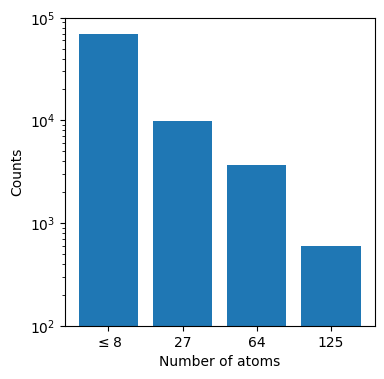

In [16]:
figsize = (4,4)
fig, ax = plt.subplots(figsize=figsize)
# get the number of atoms, [<=6, 8, 27,64,125]
counts = [len(small)] + [len(natoms[n]) for n in [27,64,125]]

# plot bar plot
ax.bar(np.arange(len(counts)),counts)
# # use scientific notation for y
# use log scale for y
ax.set_yscale('log')
# set ylim
ax.set_ylim(100,1e5)
# set xticks
ax.set_xticks(np.arange(len(counts)))
# set xticklabels
ax.set_xticklabels([r'$\leq$8', '27','64','125'])
# set xlabel
ax.set_xlabel('Number of atoms')
# set ylabel
ax.set_ylabel('Counts')

(0.0, 35000.0)

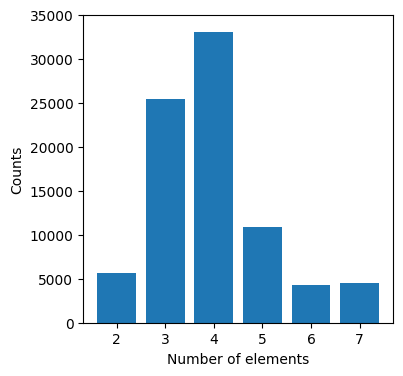

In [17]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(range(2,8),[len(neles[i]) for i in range(2,8)])
ax.set_xlabel('Number of elements')
ax.set_ylabel('Counts')
ax.set_ylim(0,3.5e4)

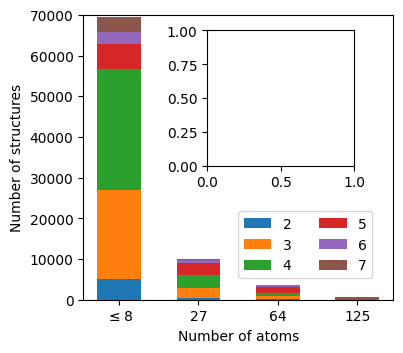

In [20]:
# counts = {r'$\leq$8':[], '27':[], '64':[], '125':[]}

# # loop over the number of elements
# for nele in range(2,8):
#     # loop over the number of atoms
#     for n in [r'$\leq$8',27,64,125]:
#         if n == r'$\leq$8':
#             counts[str(n)].append(y[(dat['NIONS']<=8) & (dat['nelements']==nele)].shape[0])
#         else:
#             # get the counts for a specific number of atoms and number of elements
#             counts[str(n)].append(y[(dat['NIONS']==n) & (dat['nelements']==nele)].shape[0])

# fig, ax = plt.subplots(figsize=(4,3.7))
# bottom = np.zeros(len(counts.keys()))
# for i,nele in enumerate(range(2,8)):
#     ax.bar(counts.keys(),
#            [counts[natom][i] for natom in counts.keys()],
#            label=str(nele),
#            width=0.55,
#            bottom=bottom)
#     bottom += np.array([counts[natom][i] for natom in counts.keys()])

# ax.set_ylim(0,7e4)
# # set legend to 3 columns
# ax.legend(loc=(0.5,0.075),ncol=2)
# # use scientific notation for y
# # ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# ax.set_xlabel('Number of atoms')
# ax.set_ylabel('Number of structures')

# # add an inset
# axins = ax.inset_axes([0.4, 0.47, 0.475, 0.475])
# bottom = np.zeros(len(counts.keys()))

In [22]:
for i,nele in enumerate(range(2,8)):
    axins.bar(['27','64','125'],
           [counts[natom][i] for natom in ['27','64','125']],
           label=str(nele),
           bottom=bottom[[1,2,3]])
    bottom += np.array([counts[natom][i] for natom in counts.keys()])
axins.set_ylim(0,1e4)
# set xticks and xticklabels
axins.set_xticks(np.arange(1,4))
axins.set_xticklabels(['27','64','125'])
axins.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

fig.tight_layout()

In [23]:
df_counts = pd.DataFrame(columns=range(2,8), index=sorted(dat['NIONS'].unique()))

for index in df_counts.index:
    for col in df_counts.columns:
        df_counts.loc[index,col] = dat[(dat['NIONS']==index) & (dat['nelements']==col)].shape[0]

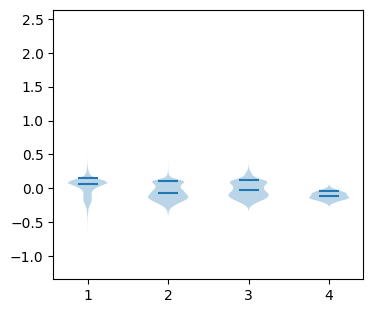

In [24]:
fig, ax = plt.subplots(figsize=(4,3.5))
# plot violin plot
violinplot = ax.violinplot([
    y[small],
    y[natoms[27]],
    y[natoms[64]],
    y[natoms[125]],
    ],
    showextrema=False,
    quantiles=[[0.50,0.90] for i in range(4)],
    )

In [25]:
for pc in violinplot['bodies']:
    pc.set_alpha(1)
violinplot['cquantiles'].set_color('r')

# set xticks
ax.set_xticks([1,2,3,4])
# set xticklabels
ax.set_xticklabels([r'$\leq$8','27','64','125'])
# set ylabel
ax.set_ylabel('Formation energy per atom (eV/atom)')
ax.set_ylim(-0.6,0.5)
# ax.grid(linewidth=0.1)
ax.set_xlabel('Number of atoms')

Text(0.5, 4.444444444444445, 'Number of atoms')

Text(0.425, 0.0, 'Number of atoms')

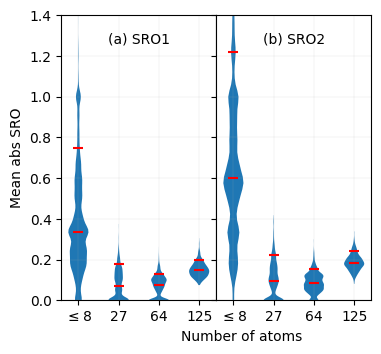

In [26]:
fig, axs = plt.subplots(figsize=(4,3.7),ncols=2,sharey=True,gridspec_kw={'wspace':0.0})

for i in range(2):
    ax = axs[i]
    # plot violin plot
    sro2plot = f'mean abs SRO{i+1}'
    violinplot = ax.violinplot([
        csro.loc[small,sro2plot],
        csro.loc[natoms[27],sro2plot],
        csro.loc[natoms[64],sro2plot],
        csro.loc[natoms[125],sro2plot],
        ],
        showextrema=False,
        quantiles=[[0.50,0.90] for i in range(4)],
        )

    # change the color of the violin plot
    for pc in violinplot['bodies']:
        pc.set_alpha(1)
    violinplot['cquantiles'].set_color('r')

    # set xticks
    ax.set_xticks([1,2,3,4])
    # set xticklabels
    ax.set_xticklabels([r'$\leq$8','27','64','125'])

    # set ylabel
    if i == 0:
        ax.set_ylabel('Mean abs SRO')
        ax.text(0.3,0.9,'(a) SRO1',transform=ax.transAxes)
    else:
        ax.text(0.3,0.9,'(b) SRO2',transform=ax.transAxes)
    ax.set_ylim(0,1.4)
    ax.grid(linewidth=0.1)
# set a common xlabel
fig.text(0.425,0.0,'Number of atoms')

Text(0.4, 0.9, '$\\geq$27 atoms')

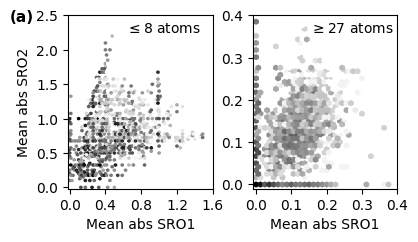

In [27]:
fig, axs = plt.subplots(figsize=(4.25,2.25),ncols=2,
                        # set the horizontal space between subplots
                        gridspec_kw={'wspace':0.275}
                        )

norm = matplotlib.colors.LogNorm(vmin=1,vmax=1000)

ax = axs[0]
# hexbin plot of SRO1 vs. SRO2 for small systems
# use a cmap that is white for small counts and black for large counts
ax.hexbin(csro.loc[small,'mean abs SRO1'],csro.loc[small,'mean abs SRO2'],
          gridsize=(60,60),cmap='Greys',norm = norm)
ax.set_xlabel('Mean abs SRO1')
ax.set_ylabel('Mean abs SRO2')
ax.set_xlim(-0.02,1.6)
ax.set_xticks([0,0.4,0.8,1.2,1.6])
ax.set_ylim(-0.02,2.5)
ax.text(0.4,0.9,r'$\leq$8 atoms',transform=ax.transAxes,
        # white background for the text
        bbox=dict(facecolor='white', edgecolor='white', pad=0.0)
        )
ax.text(-0.4,0.965, '(a)' ,transform=ax.transAxes,fontsize=11,
        weight='bold'
        )

ax=axs[1]
# hexbin plot of SRO1 vs. SRO2 for small systems
# use a cmap that is white for small counts and black for large counts
ax.hexbin(csro.loc[large,'mean abs SRO1'],csro.loc[large,'mean abs SRO2'],
          gridsize=(30,25),cmap='Greys',norm=norm)
ax.set_xlabel('Mean abs SRO1')
# ax.set_ylabel('Mean abs SRO2')
ax.set_xlim(-0.01,0.4)
ax.set_xticks([0,0.1,0.2,0.3,0.4])
ax.set_ylim(-0.01,0.4)
ax.set_yticks([0,0.1,0.2,0.3,0.4])
ax.text(0.4,0.9,r'$\geq$27 atoms',transform=ax.transAxes)


In [28]:
cbar_ax = fig.add_axes([0.915, 0.125, 0.015, 0.725])
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm,)
cbar = fig.colorbar(sm, cax=cbar_ax,orientation='vertical')
cbar.set_label('Counts')

In [29]:
def plot_ax(ax,df,ylim=(-0.01,1.8),sro2plot = 'mean abs SRO1'):

    violinplot = ax.violinplot([
        csro.loc[df[df['nelements']==n].index,sro2plot] for n in range(2,8)
        ],
        showextrema=False,
        showmedians=True,
        quantiles=[[0.5,0.90] for i in range(6)],
        )

    # change the color of the violin plot
    # for pc in violinplot['bodies']:
    #     pc.set_alpha(0.5)
    violinplot['cquantiles'].set_color('r')
    # set the linewidth of cquantiles
    violinplot['cquantiles'].set_linewidth(2)

    # set xticks
    ax.set_xticks([1,2,3,4,5,6])
    # set xticklabels
    ax.set_xticklabels(['2','3','4','5','6','7'])
    # set xlabel
    ax.set_xlabel('Number of elements')
    # set ylabel
    ax.set_ylabel(sro2plot)
    ax.set_ylim(ylim)
    # ax.grid(linewidth=0.05)
    return ax

Text(0.4, 0.0, 'Number of elements')

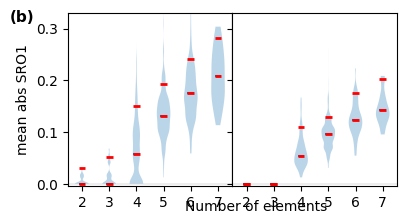

In [31]:
fig, axs = plt.subplots(figsize=(4.25,2.25),ncols=2,sharey=True,
                        # set the space between subplots
                        gridspec_kw={'wspace':0.0}
                        )

sro2plot = 'SRO1'

ax = axs[0]
plot_ax(ax,dat[dat['NIONS']==27],ylim=(0,1.4),sro2plot='mean abs '+sro2plot)
# ax.text(0.05,0.92,'(a) 27 atoms',transform=ax.transAxes)
ax.text(-0.35,0.95, '(b)' ,transform=ax.transAxes,fontsize=11,
        weight='bold'
        )


ax = axs[1]
plot_ax(ax,dat[dat['NIONS']==64],ylim=(0,1.4),sro2plot='mean abs '+sro2plot)
# ax.text(0.05,0.92,'(b) 64 atoms',transform=ax.transAxes)

# hide the ylabels for the 2nd and 3rd subplots
axs[1].set_ylabel('')
# axs[2].set_ylabel('')

# set a common xlabel
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylim(-0.005,0.33)
    # add horizontal line at 0
    ax.axhline(0, color='k',linestyle="-",linewidth=0.1)
fig.text(0.4,0.0,'Number of elements')

Text(0, 0.5, 'Counts')

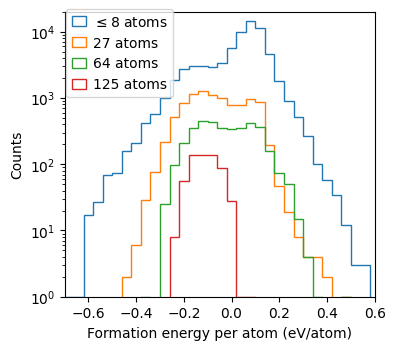

In [33]:
fig, ax = plt.subplots(figsize=(4.,3.7))
# set bins (min, max, step)
bins=np.arange(-0.7,0.64,0.04)
# plot histogram for y_large and y_small
y_small = dat[dat['NIONS']<=8]['Ef_per_atom']
# mean absolute deviation
mad = np.mean(np.abs(y_small-np.mean(y_small)))
ax.hist(y_small, bins=bins, histtype='step',
        label=r'$\leq8$ atoms'
        )


for n in [27,64,125]:
    mad = np.mean(np.abs(y[natoms[n]]-np.mean(y[natoms[n]])))
    ax.hist(y[natoms[n]], bins=bins, histtype='step',label=str(n)+' atoms')

ax.set_ylim(1,2e4)
# set xlim
ax.set_xlim(bins.min(),0.6)
# use log scale for y
ax.set_yscale('log')
# set vertical line at 0
# ax.axvline(0, color='k',linewidth=0.1)
ax.legend(
    loc=(0.005,0.7),
        # adjust the size of the legend
        handlelength=1.,
        handletextpad=0.5,

)
# set xlabel
ax.set_xlabel('Formation energy per atom (eV/atom)')
# set ylabel
ax.set_ylabel('Counts')

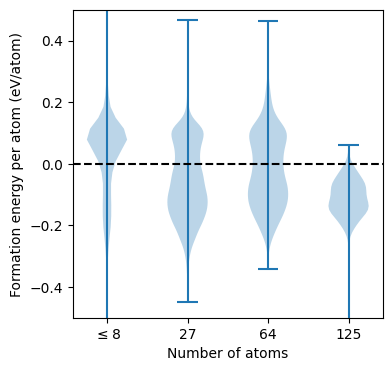

In [34]:
fig, ax = plt.subplots(figsize=figsize)
# plot violin plot
ax.violinplot([y_small,y[natoms[27]],y[natoms[64]],y[natoms[125]]])
# # set ylim
ax.set_ylim(-0.5,0.5)
# set xticks
ax.set_xticks(np.arange(1,5))
# set xticklabels
ax.set_xticklabels(['$\leq$8','27','64','125'])
# set xlabel
ax.set_xlabel('Number of atoms')
# set ylabel
ax.set_ylabel('Formation energy per atom (eV/atom)')
# set horizontal line at 0
ax.axhline(0, color='k', linestyle='--')

In [40]:
# features = [i for i in X_std.columns if i in compo_names]
# # features = [i for i in X_std.columns if i in struc_names]
# X_pca_in = X_std[features]


# # PCA
# pca = PCA()
# X_pca = pca.fit_transform(X_pca_in)
# X_pca = pd.DataFrame(X_pca,index=X.index,
#                      columns = [*range(X_pca.shape[1])]
#                      )

# #%%
# cluster0 = dat[(X_pca[0]>=-0.05)].index # Also related to composition
# c = X_pca[0]<0
# fig, ax = plt.subplots(figsize=figsize)
# ax.scatter(X_pca[0],X_pca[1],c=c,alpha=0.5,s=5)

In [39]:
# cluster1 = dat[(X_pca[0]<-0.05)].index # Also related to composition
# c = X_pca[0]<0
# fig, ax = plt.subplots(figsize=figsize)
# ax.scatter(X_pca[0],X_pca[1],c=c,alpha=0.5,s=5)

# #%%
# cluster2 = dat[(X_pca[1]>21)].index # Al-Si
# c = X_pca[1]>21
# fig, ax = plt.subplots(figsize=figsize)
# ax.scatter(X_pca[0],X_pca[1],c=c,alpha=0.5,s=5)

# #%%
# chemical_system1 = dat.loc[cluster1, 'chemical_system'].unique()
# chemical_system_non1 = dat.loc[cluster0, 'chemical_system'].unique()

In [41]:
# chemical_system1_set = set(chemical_system1)
# chemical_system_non1_set = set(chemical_system_non1)
# chemical_system1_set.issubset(chemical_system_non1_set)

# #%%

# # get the coefficients for the first principal component
# coeff = pd.DataFrame(pca.components_[0],index=X_pca_in.columns,columns=['coeff'])
# # sort the coefficients
# coeff = coeff.sort_values(by='coeff',ascending=False)

In [42]:
# fig, ax = plt.subplots(figsize=figsize)
# ax.scatter(X_pca[0],X_pca[1],c=y,cmap='rainbow',alpha=0.5,s=5)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# # set colorbar
# sm = plt.cm.ScalarMappable(cmap='rainbow',
#                         #    norm=plt.Normalize(vmin=y.min(), vmax=y.max())
#                            )
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)
# cbar.set_label('Formation energy per atom (eV/atom)')
# # set title
# ax.set_title('PCA of the feature space')

# # same plot but color by the number of atoms
# fig, ax = plt.subplots(figsize=figsize)
# ax.scatter(X_pca[0],X_pca[1],c=dat['NIONS'],cmap='rainbow',alpha=0.5,s=5)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# # set colorbar
# sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=dat['NIONS'].min(), vmax=dat['NIONS'].max()))
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)
# cbar.set_label('Number of atoms')
# # set title
# ax.set_title('PCA of the feature space')

# # same plot but color by the number of elements
# fig, ax = plt.subplots(figsize=figsize)
# ax.scatter(X_pca[0],X_pca[1],c=dat['nelements'],cmap='rainbow',alpha=0.5,s=5)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# # set colorbar
# sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=dat['nelements'].min(), vmax=dat['nelements'].max()))
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)
# cbar.set_label('Number of elements')
# # set title
# ax.set_title('PCA of the feature space')

# # same plot but color by the space group number
# fig, ax = plt.subplots(figsize=figsize)
# ax.scatter(X_pca.loc[:,0],X_pca.loc[:,1],c=sg.loc[:],cmap='rainbow',alpha=0.5,s=5)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# # set colorbar
# sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=sg.min(), vmax=sg.max()))
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)
# cbar.set_label('Space group number')
# # set title
# ax.set_title('PCA of the feature space')